# Install Required Libraries

In [ ]:
!pip install SpeechRecognition pydub
!apt install ffmpeg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 47.1 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!pip install git+https://github.com/linto-ai/whisper-timestamped
!pip install git+https://github.com/openai/whisper.git
# !apt update && apt install ffmpeg

  Cloning https://github.com/linto-ai/whisper-timestamped to /tmp/pip-req-build-mbt_ad8y
  Running command git clone --filter=blob:none --quiet https://github.com/linto-ai/whisper-timestamped /tmp/pip-req-build-mbt_ad8y
  Resolved https://github.com/linto-ai/whisper-timestamped to commit cd168902a00efcd0ca4e17e39e2861c2abc7342f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 26.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.7/801.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [ ]:
# Custom Whisper for Disfluency ASR
!mkdir demo_models
%cd demo_models
!mkdir asr
%cd asr
!gdown --id 1BeT7m_5qv19Sb5yrZ2zhKu6fEprUoB9N -O config.json
!gdown --id 13n8VrTFVq4jGouCDamkReHlHm_1yz20U -O pytorch_model.bin
%cd ..
!gdown --id 1GQIXgCSF3Usiuy5hkxgOl483RPX3f_SX -O language.pt
!gdown --id 1wWrmopvvdhlBw-cL7EDyih9zn_IJu5Wr -O acoustic.pt
!gdown --id 1LPchbScA_cuFx1XoNxpFCYZfGoJCfWao -O multimodal.pt

/content/demo_models
/content/demo_models/asr
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BeT7m_5qv19Sb5yrZ2zhKu6fEprUoB9N
To: /content/demo_models/asr/config.json
100% 2.21k/2.21k [00:00<00:00, 8.92MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=13n8VrTFVq4jGouCDamkReHlHm_1yz20U
From (redirected): https://drive.google.com/uc?id=13n8VrTFVq4jGouCDamkReHlHm_1yz20U&confirm=t&uuid=9b955197-4a91-4c24-876e-a69c3059142b
To: /content/demo_models/asr/pytorch_model.bin
100% 967M/967M [00:12<00:00, 74.7MB/s]
/content/demo_models
/usr

In [ ]:
%cd /content/

/content


In [ ]:
!pip install shap

# Download Data

In [ ]:
!gdown 1NwsSZLtAs37ToCQ8qGP42TBNcdb7gt8W # myrecording5.wav
!gdown 1wY0EgoWuwu7J8LDdqND0Y3iDhwKelU7Y # myrecording4.wav
!gdown 1helgbcCjQspEhqWyHC_AHQUNwTSb91iw # best_llm_model.bin

Downloading...
From: https://drive.google.com/uc?id=1NwsSZLtAs37ToCQ8qGP42TBNcdb7gt8W
To: /content/my_recording5.wav
100% 5.76M/5.76M [00:00<00:00, 36.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wY0EgoWuwu7J8LDdqND0Y3iDhwKelU7Y
To: /content/my_recording4.wav
100% 57.4M/57.4M [00:01<00:00, 49.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1helgbcCjQspEhqWyHC_AHQUNwTSb91iw
From (redirected): https://drive.google.com/uc?id=1helgbcCjQspEhqWyHC_AHQUNwTSb91iw&confirm=t&uuid=e6d10bb1-2e45-4a91-a9be-442b477e15d8
To: /content/best_llm_model.bin
100% 436M/436M [00:03<00:00, 121MB/s]


# Transcribe [RAW CODE]

In [ ]:
import whisper_timestamped as whisper

model = whisper.load_model('demo_models/asr')

# Transcribe
result = whisper.transcribe(model, "my_recording5.wav", language='en', beam_size=5, temperature=(0.0, 0.2, 0.4, 0.6, 0.8, 1.0))

# View basic output
for segment in result["segments"]:
    print(f"[{segment['start']:.2f} - {segment['end']:.2f}]: {segment['text']}")

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:130: UserWarning: Performing inference on CPU when CUDA is available
  warnings.warn("Performing inference on CPU when CUDA is available")
100%|██████████| 6000/6000 [02:03<00:00, 48.58frames/s]


[0.00 - 14.14]:  please talk about the impact of stuttering on your daily life you can talk about your
[14.14 - 25.14]:  interactions with family and friends school and or work and your partici patient and
[25.14 - 35.90]:  commu community activities um in my daily life it doesn t really have a an impact on me um
[36.58 - 46.78]:  because i i i don t allow it to have an impact on on me um uh i think it s worse in my job
[46.86 - 56.18]:  uh where i talk to customers and and and they don t they don t don t know that i just don t
[56.18 - 59.06]:  have to be you know be a professional and


# Predict with Trained Model [RAW CODE]

In [ ]:
#pip install torch pandas transformers
import torch
import pandas as pd
from transformers import BertForTokenClassification, BertTokenizerFast

# --- 1. Configuration ---
# Ensure these match the settings used during training
MODEL_NAME = 'bert-base-uncased'
BEST_MODEL_PATH = 'best_llm_model.bin' # The path to your saved model
MAX_LENGTH = 256
LABELS = ['fp', 'rp', 'rv', 'pw']
LABELS = ['Filled Pause', 'Repitition', 'Revision', 'Partial Word']
# filled pause (fp), repetition (rp), revision (rv), or partial word (pw)

# --- 2. Setup Model, Tokenizer, and Device ---
print("--- Loading model and tokenizer ---")
try:
    # Set the device to GPU (cuda) if available, otherwise CPU
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Load the tokenizer
    tokenizer = BertTokenizerFast.from_pretrained(MODEL_NAME)

    # Initialize a fresh model architecture
    model = BertForTokenClassification.from_pretrained(MODEL_NAME, num_labels=len(LABELS))

    # Load the saved weights from your best model
    model.load_state_dict(torch.load(BEST_MODEL_PATH, map_location=device))

    # Move the model to the correct device and set it to evaluation mode
    model.to(device)
    model.eval()
    print("✅ Model and tokenizer loaded successfully.")

except FileNotFoundError:
    print(f"❌ ERROR: Model file not found at '{BEST_MODEL_PATH}'.")
    print("Please ensure the file exists in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred during setup: {e}")
    exit()


# --- 3. Prediction Function ---
def predict_disfluencies(text: str):
    """
    Takes a raw text sentence and returns a DataFrame with predictions for each word.
    """
    if not text.strip():
        return pd.DataFrame(columns=['word'] + LABELS)

    # Prepare the input text
    words = text.split()
    encoding = tokenizer(words,
                         is_split_into_words=True,
                         return_tensors="pt",
                         padding='max_length',
                         truncation=True,
                         max_length=MAX_LENGTH)

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    # Make a prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    # Process the model's output
    predictions = torch.sigmoid(logits) > 0.5
    predictions = predictions.cpu().numpy()[0]

    # Align predictions with the original words
    results = []
    word_ids = encoding.word_ids()
    previous_word_id = None
    for i, word_id in enumerate(word_ids):
        # We only care about the first sub-token of each word
        if word_id is not None and word_id != previous_word_id:
            word = words[word_id]
            pred = predictions[i]
            # Create a dictionary for the word and its predicted labels
            result_row = {'word': word}
            result_row.update({label: bool(p) for label, p in zip(LABELS, pred)})
            results.append(result_row)
        previous_word_id = word_id

    return pd.DataFrame(results)


--- Loading model and tokenizer ---
Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model and tokenizer loaded successfully.


In [ ]:
# You can change the text in this variable to test any sentence
test_verbatim = result['segments'][2]['text']

# print(f"\n--- Predicting for verbatim: ---\n'{test_verbatim}'")

# Get and display the predictions
prediction_df = predict_disfluencies(test_verbatim)

# Use .to_string() to ensure the full table is printed
# print(prediction_df.to_string())

In [ ]:
prediction_df.to_csv('prediction_df.csv', index=False)

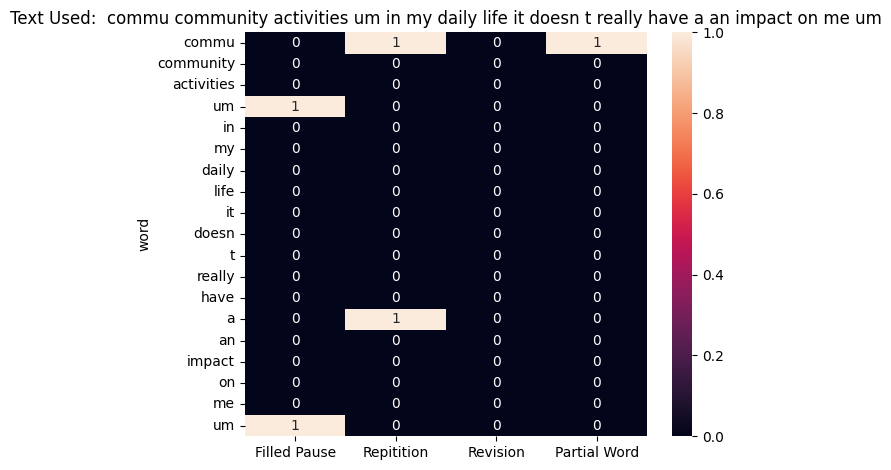


--- Predicting for verbatim: ---
' commu community activities um in my daily life it doesn t really have a an impact on me um'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
prediction_df2 = prediction_df.copy()
prediction_df2.index = prediction_df2['word']
prediction_df2 = prediction_df2.drop(columns=['word'])
sns.heatmap(prediction_df2, annot=True)
plt.title(f"Text Used: {test_verbatim}")
plt.tight_layout()
plt.show()
print(f"\n--- Predicting for verbatim: ---\n'{test_verbatim}'")

In [ ]:
# import shap
# # from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
# def f_all(texts):
#     words = texts[0].split()
#     enc    = tokenizer(words,
#                          is_split_into_words=True,
#                          return_tensors="pt",
#                          padding='max_length',
#                          truncation=True,
#                          max_length=MAX_LENGTH)
#     model.eval()
#     logits = model(**enc).logits  # [B, M, C]
#     probs  = torch.softmax(logits, dim=-1).cpu().detach().numpy()  # [B, M, C]
#     # Flatten to shape [B, M*C]
#     return probs.reshape(probs.shape[0], -1)


In [56]:
# from transformers import GPT2Tokenizer, GPT2LMHeadModel

# tokenizer_gpt2 = GPT2Tokenizer.from_pretrained("distilgpt2")
# model_gpt2     = GPT2LMHeadModel.from_pretrained("distilgpt2")
# model_gpt2.eval()

In [ ]:
# # Define disfluency label columns
# label_columns = ["Filled Pause", "Repitition", "Revision", "Partial Word"]

# # Function to get the first true label or 'O'
# def get_label(row):
#     for label in label_columns:
#         if row[label]:
#             return label
#     return "O"
# df = prediction_df.copy()
# # Apply to each row
# df["label"] = df.apply(get_label, axis=1)

In [45]:
# Define disfluency label columns
label_columns = ["Filled Pause", "Repitition", "Revision", "Partial Word"]

# Function to get all true labels or 'O'
def get_label(row):
    labels = [label for label in label_columns if row[label]]
    return ", ".join(labels) if labels else "O"

# Make a copy of the original DataFrame
df = prediction_df.copy()

# Apply the function to assign labels
df["label"] = df.apply(get_label, axis=1)

In [44]:
# words  = df["word"].tolist()
# labels = df["label"].tolist()

# prompt = build_prompt(words, labels)
# explanation = generate_explanation(prompt)

# print("\nSentence:", " ".join(words))
# print("\nExplanation:", explanation)

In [31]:
!pip install google-generativeai datasets==2.18.0 tqdm -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 15.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.2.0 which is incompatible.


In [32]:
import google.generativeai as genai
from google.colab import userdata

try:
    api_key = userdata.get('GOOGLE_API_KEY')
    genai.configure(api_key=api_key)
    print("Successfully configured Gemini API!")
except Exception as e:
    print(f"Error: Could not configure API. Please ensure you have set the GOOGLE_API_KEY secret correctly. Details: {e}")

Successfully configured Gemini API!


In [33]:
!gcloud auth application-default login

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=S0tDe76wPiltSayjpN0wNG4MIFegPe&prompt=consent&token_usage=remote&access_type=offline&code_challenge=opaieDAbMCLOW6q3c_wp5JnW49i097DXTOY-L7rmpxM&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AVMBsJgP-NM266gOfrGNWMjL5zI57HCe860jTKd8bLaPXVEL-EqCfhyYlIAUMz2KVeGb8w

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).
Ca

In [34]:
import vertexai
from vertexai.generative_models import GenerativeModel, ChatSession
import google.auth

class Gemini:
    def __init__(self, project_id, location="us-central1", model_name="gemini-2.5-flash"):
        """Initialize the Gemini model client."""
        self.project_id = project_id
        self.location = location
        self.model_name = model_name
        self.chat = None
        vertexai.init(project=project_id, location=location)
        self.model = GenerativeModel(self.model_name)
        print(f"Initialized Gemini model: {model_name}")

    def start_chat(self, **kwargs):
        self.chat = self.model.start_chat(**kwargs)
        print("Chat session started.")

    def call(self, prompt, **kwargs):
        try:
            if self.chat:
                response = self.chat.send_message(prompt, **kwargs)
            else:
                response = self.model.generate_content(prompt, **kwargs)
            return response.text
        except Exception as e:
            raise RuntimeError(f"Gemini API call failed: {e}")

In [35]:
import os
import random
import re
from datasets import load_dataset
from tqdm.notebook import tqdm

# 1. Configure the Model
# model = genai.GenerativeModel('gemini-2.5-flash-preview-04-17') #gemini-2.5-flash-preview-04-17
model = Gemini(project_id="gen-ai-hw1")
print(f"Model '{model.model_name}' is ready.")

Initialized Gemini model: gemini-2.5-flash
Model 'gemini-2.5-flash' is ready.


/usr/local/lib/python3.11/dist-packages/vertexai/generative_models/_generative_models.py:433: UserWarning: This feature is deprecated as of June 24, 2025 and will be removed on June 24, 2026. For details, see https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations/genai-vertexai-sdk.
  warning_logs.show_deprecation_warning()


In [36]:
model = Gemini(project_id="gen-ai-hw1",model_name="gemini-2.5-flash")
model.start_chat()

Initialized Gemini model: gemini-2.5-flash
Chat session started.


In [54]:
def build_prompt(words, labels):
    pairs = [f"{w} ({l})" for w, l in zip(words, labels)]
    annotated = " ".join(pairs)

    prompt = (
        f"Disfluent sentence with word-level annotations:\n "
        f"{annotated} \n\n"
        f"Using the annotation, explain what disfluency events were found in the sentence. "
        f"Furthermore, explain what are the possible causes for disfluency in this particluar sentence."
        f" Do not give any preamble. "
        f"Do not include a summary or a general statement about spontaneous speech. "
        f"Do not provide a conclusion. Your response should contain only direct, specific observations "
        f"in 3 to 5 sentences. Avoid using phrases like 'collectively this shows', 'these disfluencies illustrate', or 'in general'."
        f"\n\nExplanation:"
    )
    return prompt

In [48]:
prompt

'Disfluent sentence with word-level annotations:\ncommu (Repitition, Partial Word) community (O) activities (O) um (Filled Pause) in (O) my (O) daily (O) life (O) it (O) doesn (O) t (O) really (O) have (O) a (Repitition) an (O) impact (O) on (O) me (O) um (Filled Pause)\n\nUsing the annotation, explain what disfluency events were found in the sentence. Furthermore, explain what are the possible causes for disfluency in this particluar sentence. Do not give any preamble. Give your explanation in 3-5 sentences.\n\nExplanation:'

In [55]:
words  = df["word"].tolist()
labels = df["label"].tolist()

prompt = build_prompt(words, labels)
explanation = model.call(prompt)

print("\nSentence:", " ".join(words))
print("\nExplanation:")
explanation


Sentence: commu community activities um in my daily life it doesn t really have a an impact on me um

Explanation:


'The sentence includes a partial word repetition, a full word repetition acting as a self-correction, and two filled pauses. "Commu community" indicates a momentary difficulty in initiating or fully retrieving the word. The "a an" sequence shows the speaker\'s real-time grammatical monitoring and correction of the article. The "um" filled pauses suggest the speaker is actively planning upcoming words or syntactic structures during the utterance.'

# LIVE DEMO

In [72]:
# Transcribe
model_whisper = whisper.load_model('demo_models/asr', device = 'cuda')

# Transcribe
result = whisper.transcribe(model_whisper, "my_recording5.wav", language='en', beam_size=5, temperature=(0.0, 0.2, 0.4, 0.6, 0.8, 1.0))

# View basic output
for i, segment in enumerate(result["segments"]):
    print(f"Index {i} [{segment['start']:.2f} - {segment['end']:.2f}]: {segment['text']}")

100%|██████████| 6000/6000 [00:04<00:00, 1446.23frames/s]


Index 0 [0.00 - 14.14]:  please talk about the impact of stuttering on your daily life you can talk about your
Index 1 [14.14 - 25.14]:  interactions with family and friends school and or work and your partici patient and
Index 2 [25.14 - 41.94]:  commu community activities um in my daily life it doesn t really have a have a an impact on me um because i i i don t allow it to have a impact on on me um
Index 3 [43.62 - 59.08]:  uh i think it s was in my job uh where i talked to the customers and and and they don t they don t don t know that i started and i have to be you know the professional and


In [73]:
# set text for evaluation
test_verbatim = result['segments'][2]['text']

In [74]:
# --- 1. Configuration ---
# Ensure these match the settings used during training
MODEL_NAME = 'bert-base-uncased'
BEST_MODEL_PATH = 'best_llm_model.bin' # The path to your saved model
MAX_LENGTH = 256
LABELS = ['fp', 'rp', 'rv', 'pw']
LABELS = ['Filled Pause', 'Repitition', 'Revision', 'Partial Word']
# filled pause (fp), repetition (rp), revision (rv), or partial word (pw)

# --- 2. Setup Model, Tokenizer, and Device ---
print("--- Loading model and tokenizer ---")
try:
    # Set the device to GPU (cuda) if available, otherwise CPU
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Load the tokenizer
    tokenizer = BertTokenizerFast.from_pretrained(MODEL_NAME)

    # Initialize a fresh model architecture
    model = BertForTokenClassification.from_pretrained(MODEL_NAME, num_labels=len(LABELS))

    # Load the saved weights from your best model
    model.load_state_dict(torch.load(BEST_MODEL_PATH, map_location=device))

    # Move the model to the correct device and set it to evaluation mode
    model.to(device)
    model.eval()
    print("✅ Model and tokenizer loaded successfully.")

except FileNotFoundError:
    print(f"❌ ERROR: Model file not found at '{BEST_MODEL_PATH}'.")
    print("Please ensure the file exists in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred during setup: {e}")
    exit()


# --- 3. Prediction Function ---
def predict_disfluencies(text: str):
    """
    Takes a raw text sentence and returns a DataFrame with predictions for each word.
    """
    if not text.strip():
        return pd.DataFrame(columns=['word'] + LABELS)

    # Prepare the input text
    words = text.split()
    encoding = tokenizer(words,
                         is_split_into_words=True,
                         return_tensors="pt",
                         padding='max_length',
                         truncation=True,
                         max_length=MAX_LENGTH)

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    # Make a prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    # Process the model's output
    predictions = torch.sigmoid(logits) > 0.5
    predictions = predictions.cpu().numpy()[0]

    # Align predictions with the original words
    results = []
    word_ids = encoding.word_ids()
    previous_word_id = None
    for i, word_id in enumerate(word_ids):
        # We only care about the first sub-token of each word
        if word_id is not None and word_id != previous_word_id:
            word = words[word_id]
            pred = predictions[i]
            # Create a dictionary for the word and its predicted labels
            result_row = {'word': word}
            result_row.update({label: bool(p) for label, p in zip(LABELS, pred)})
            results.append(result_row)
        previous_word_id = word_id

    return pd.DataFrame(results)

--- Loading model and tokenizer ---
Using device: cuda


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model and tokenizer loaded successfully.


Input text:
  commu community activities um in my daily life it doesn t really have a have a an impact on me um because i i i don t allow it to have a impact on on me um




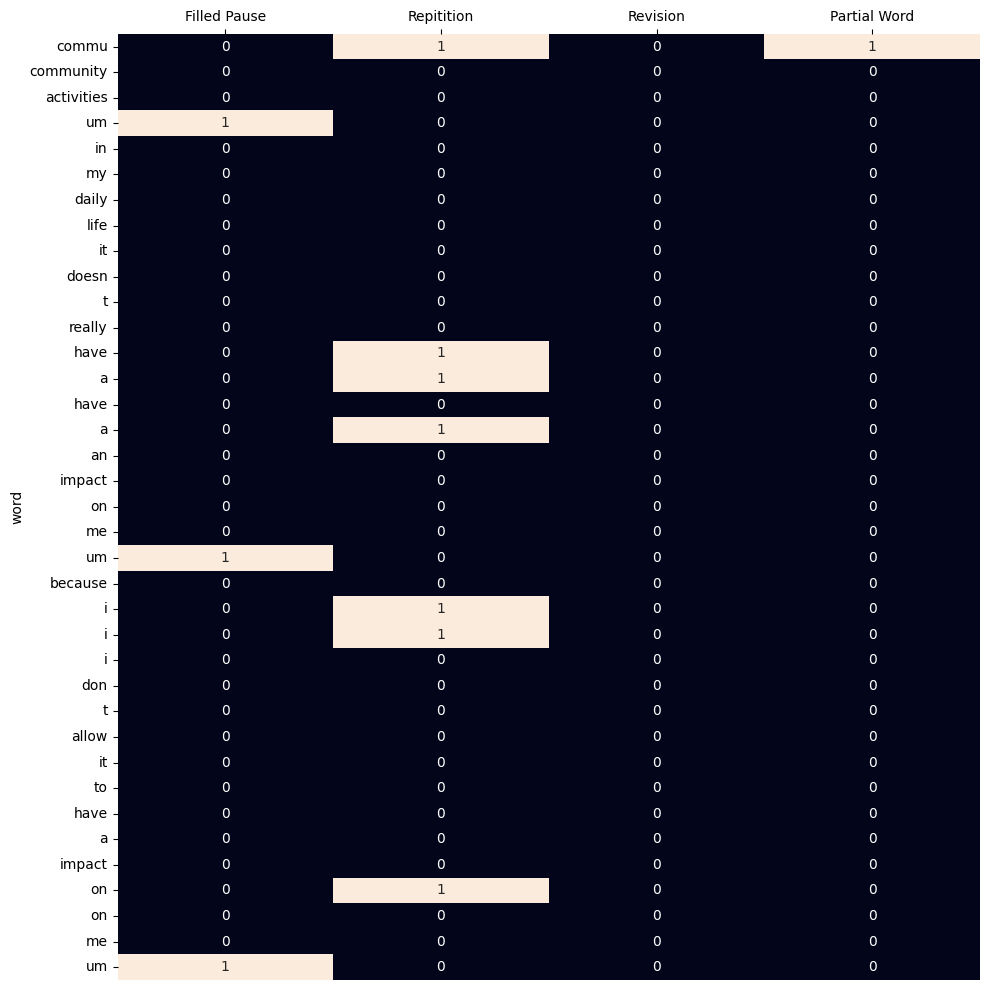

In [75]:
# Predict Word Level Disfluency
prediction_df = predict_disfluencies(test_verbatim)
print(f"Input text:\n {test_verbatim}\n\n")

prediction_df2 = prediction_df.copy()
prediction_df2.index = prediction_df2['word']
prediction_df2 = prediction_df2.drop(columns=['word'])

plt.figure(figsize=(10, 10))
ax = sns.heatmap(prediction_df2, annot=True, cbar = False)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.show()

In [76]:
# Prompting for Explanation
# Define disfluency label columns
label_columns = ["Filled Pause", "Repitition", "Revision", "Partial Word"]

# Function to get all true labels or 'O'
def get_label(row):
    labels = [label for label in label_columns if row[label]]
    return ", ".join(labels) if labels else "O"

# Make a copy of the original DataFrame
df = prediction_df.copy()

# Apply the function to assign labels
df["label"] = df.apply(get_label, axis=1)
df.head()

,word,Filled Pause,Repitition,Revision,Partial Word,label
0,commu,False,True,False,True,"Repitition, Partial Word"
1,community,False,False,False,False,O
2,activities,False,False,False,False,O
3,um,True,False,False,False,Filled Pause
4,in,False,False,False,False,O


In [77]:
def build_prompt(words, labels):
    pairs = [f"{w} ({l})" for w, l in zip(words, labels)]
    annotated = " ".join(pairs)

    prompt = (
        f"Disfluent sentence with word-level annotations:\n "
        f"{annotated} \n\n" # given annotation
        f"Using the annotation, explain what disfluency events were found in the sentence. " # the main task
        f"Furthermore, explain what are the possible causes for disfluency in this particluar sentence."
        f" Do not give any preamble. " # stops gemini from rambling on
        f"Do not include a summary or a general statement about spontaneous speech. "
        f"Do not provide a conclusion. Your response should contain only direct, specific observations "
        f"in 3 to 5 sentences. Avoid using phrases like 'collectively this shows', 'these disfluencies illustrate', or 'in general'."
        f"\n\nExplanation:"
    )
    return prompt

In [78]:
model_gemini = Gemini(project_id="gen-ai-hw1")
print(f"Model '{model_gemini.model_name}' is ready.")

Initialized Gemini model: gemini-2.5-flash
Model 'gemini-2.5-flash' is ready.


/usr/local/lib/python3.11/dist-packages/vertexai/generative_models/_generative_models.py:433: UserWarning: This feature is deprecated as of June 24, 2025 and will be removed on June 24, 2026. For details, see https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations/genai-vertexai-sdk.
  warning_logs.show_deprecation_warning()


In [79]:
words  = df["word"].tolist()
labels = df["label"].tolist()

prompt = build_prompt(words, labels)
explanation = model_gemini.call(prompt)

print("\nSentence:", " ".join(words))
print("\nExplanation:")
explanation


Sentence: commu community activities um in my daily life it doesn t really have a have a an impact on me um because i i i don t allow it to have a impact on on me um

Explanation:


'The sentence exhibits disfluency events including partial word repetition ("commu community"), multiple word repetitions ("have a have," "a an," "i i i," "on on"), and filled pauses ("um"). The partial word repetition suggests a momentary difficulty in retrieving or articulating the complete word. Word repetitions like "have a have" and "i i i" indicate the speaker is likely buying time for utterance planning or struggling with syntactic formulation. The repetition "a an" specifically points to a self-correction in article usage. The presence of filled pauses ("um") throughout the utterance suggests the speaker is taking time to plan subsequent phrases or search for appropriate lexical items.'